In [1]:
!pip3.11 install openai


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [9]:
import openai

# get API key from top-right dropdown on OpenAI website
openai.api_key = ""

In [3]:
# first let's make it simpler to get answers
def complete(prompt):
    # query text-davinci-003
    res = openai.Completion.create(
        engine='text-davinci-003',
        prompt=prompt,
        temperature=0,
        max_tokens=400,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None
    )
    return res['choices'][0]['text'].strip()

In [4]:
#reading file and writing it into array
file_name = "air-travel-podcast"

In [5]:
with open(file_name) as infile:
    content = infile.read()

In [6]:
len(content)

165461

In [7]:
content = (content.split('\n\n'))

In [8]:
script = "" ##file in string text
script_map = [] ##text to key value pair 

In [9]:
#replacing : with - beacause gpt prompt uses : as well.
for i in range(len(content)):
    script_map.append(content[i].replace('\n',''))

In [10]:
tokenBlocks = []
tokenSize = 5000 ##number of characters. One Token = ~ 4 characters.
maxTokenSize = 4097 ##this is for future use case. Objective is to  
approxToken = tokenSize/4
print('Approx tokens: ',approxToken)
lenght_of_prompt = maxTokenSize - approxToken
print('Length of prompt', lenght_of_prompt)

Approx tokens:  1250.0
Length of prompt 2847.0


In [11]:
script_map[:10]

['EPISODE TRANSCRIPTToday, I want to talk about something we hate. Something we love to hate. At least we say we hate it. But do we really? And if so, why do we hate it? These are big questions. So let’s start small. Let’s start by listening in on a phone call, with a man named Troy Jaster.',
 'Troy JASTER: Hi. Um, we have a flight that’s supposed to take off in a couple of hours, but got a notification it’s delayed. And so I’m looking on your website. Looks like there’s probably not a chance that we get in tonight still. But anyway, we have to rebook in one way or another.',
 'BOOKING AGENT: Sure. No problem, sir. I have a reservation for a party of four?  ',
 'JASTER: Uh-huh.',
 'BOOKING AGENT: Give me one moment, let me check your flight. Hold on, please.',
 'Jaster is a 43-year-old real-estate agent and investor in San Antonio, Texas. This past Christmas, he was trying to get himself, his wife Danika, and their two young sons to Omaha, Nebraska, to visit with the grandparents. But,

In [12]:
!pip3.11 install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [13]:
import pandas as pd

In [14]:
len(script_map[:50])

50

In [13]:
script_pd = pd.DataFrame(script_map, columns=['text'])


In [14]:
script_pd.to_csv('processed/airtravelpoc.csv')

In [30]:
!pip3.11 install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 19.0 MB/s eta 0:00:00


In [32]:
!pip3.11 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 24.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 15.2 MB/s eta 0:00:00


<Axes: >

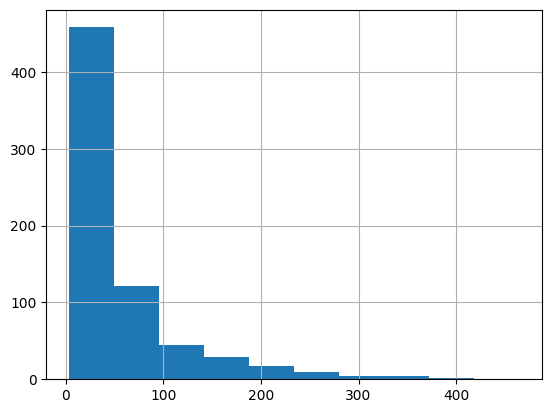

In [15]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/airtravelpoc.csv', index_col=0)

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [16]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<Axes: >

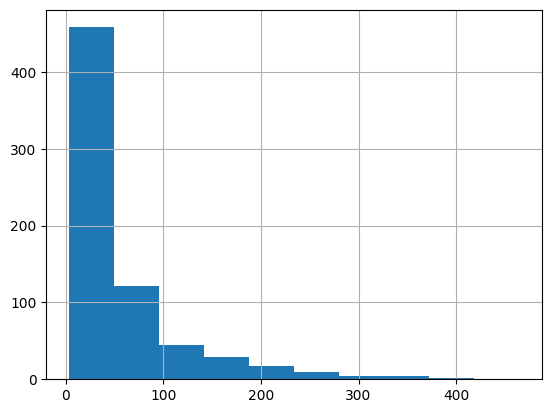

In [17]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [17]:
df.head()

,text,n_tokens
0,"EPISODE TRANSCRIPTToday, I want to talk about ...",74
1,"Troy JASTER: Hi. Um, we have a flight that’s s...",71
2,"BOOKING AGENT: Sure. No problem, sir. I have a...",23
3,JASTER: Uh-huh.,7
4,"BOOKING AGENT: Give me one moment, let me chec...",21


In [18]:
pip install --upgrade openai[embeddings]


zsh:1: no matches found: openai[embeddings]


Note: you may need to restart the kernel to use updated packages.


In [19]:
import time

embeddings_list = []
for i, x in enumerate(df.text):
    if i % 10 == 0 and i != 0:
        time.sleep(1) # add delay of 1 second after every 10 iterations
    embedding = openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding']
    embeddings_list.append(embedding)

df['embeddings'] = embeddings_list


In [20]:
df.to_csv('processed/embeddingspoc.csv')
df.head()

,text,n_tokens,embeddings
0,"EPISODE TRANSCRIPTToday, I want to talk about ...",74,"[0.014348091557621956, -0.008255427703261375, ..."
1,"Troy JASTER: Hi. Um, we have a flight that’s s...",71,"[-0.023688025772571564, -0.0276600643992424, -..."
2,"BOOKING AGENT: Sure. No problem, sir. I have a...",23,"[0.011306735686957836, -0.01458767894655466, -..."
3,JASTER: Uh-huh.,7,"[-0.01653999462723732, -0.03378884494304657, 0..."
4,"BOOKING AGENT: Give me one moment, let me chec...",21,"[-0.03909541293978691, -0.037592723965644836, ..."


In [21]:
df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

df.to_csv('processed/embeddingspoc.csv')
df.head()

Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)

In [22]:
df.size

2076

In [23]:
!pip3.11 install plotly


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [24]:
!pip3.11 install scipy


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [25]:
!pip3.11 install "openai[embeddings]"



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
import numpy as np
from openai.embeddings_utils import distances_from_embeddings

In [3]:
import pandas as pd

In [4]:


df=pd.read_csv('processed/embeddingspoc.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,"EPISODE TRANSCRIPTToday, I want to talk about ...",74,"[0.014348091557621956, -0.008255427703261375, ..."
1,"Troy JASTER: Hi. Um, we have a flight that’s s...",71,"[-0.023688025772571564, -0.0276600643992424, -..."
2,"BOOKING AGENT: Sure. No problem, sir. I have a...",23,"[0.011306735686957836, -0.01458767894655466, -..."
3,JASTER: Uh-huh.,7,"[-0.01653999462723732, -0.03378884494304657, 0..."
4,"BOOKING AGENT: Give me one moment, let me chec...",21,"[-0.03909541293978691, -0.037592723965644836, ..."


In [5]:
df.head(40)

,text,n_tokens,embeddings
0,"EPISODE TRANSCRIPTToday, I want to talk about ...",74,"[0.014348091557621956, -0.008255427703261375, ..."
1,"Troy JASTER: Hi. Um, we have a flight that’s s...",71,"[-0.023688025772571564, -0.0276600643992424, -..."
2,"BOOKING AGENT: Sure. No problem, sir. I have a...",23,"[0.011306735686957836, -0.01458767894655466, -..."
3,JASTER: Uh-huh.,7,"[-0.01653999462723732, -0.03378884494304657, 0..."
4,"BOOKING AGENT: Give me one moment, let me chec...",21,"[-0.03909541293978691, -0.037592723965644836, ..."
5,Jaster is a 43-year-old real-estate agent and ...,158,"[-0.01634581945836544, -0.030469607561826706, ..."
6,BOOKING AGENT: I’m really sorry to keep you wa...,17,"[-0.02058183029294014, -0.02154153771698475, -..."
7,JASTER: Yes.,6,"[-0.00268557365052402, -0.030985847115516663, ..."
8,BOOKING AGENT: I only have one seat available ...,19,"[-0.019197804853320122, 0.001781832193955779, ..."
9,JASTER: So then the first available is the 4:2...,16,"[-0.016549253836274147, -0.016891561448574066,..."


In [6]:
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

In [7]:
def answer_question(
    df,
    model="text-davinci-003",
    question="Thoughts on air travel?",
    max_len=1000,
    size="ada",
    debug=False,
    max_tokens=2800,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [27]:
answer_question(df, question="What is the job of filght stewradess?")

'Flight attendants are trained to jump into action, give C.P.R., revive people, de-escalate someone who’s angry about something, evacuate an aircraft, and keep passengers safe. They also oversee the above-wing, below-wing, ramp, baggage, fueling, servicing the lavatories, catering, and tower functions.'

In [24]:
answer_question(df, question="Is there any reference to size of airline business in podcast? what is it?")

'Yes, Ed Bastian mentions that consolidation has been a great success for consumers and employees of the airline, and that the size of Delta and Northwest combined is more than twice what it was ten years earlier.'

In [25]:
answer_question(df, question="who is Ed Bastian?")

'Ed Bastian is the C.E.O. of Delta Air Lines.'

In [49]:
answer_question(df, question="Give me quotable portion from conversation that talks about delta airline")
#question out of context or topic which is not present in document

'"We spent some time in Atlanta, at the headquarters of Delta Air Lines, which is one of the world’s largest airlines by revenue."'